In [1]:
# Hurricane Analysis
# -------------------------
# The purpose of this notebook is to create a predictive model for hurricanes.
# Dataset from Kaggle: Hurricanes and Typhoons, 1851-2014
# https://www.kaggle.com/noaa/hurricane-database

In [2]:
# Dependancies
import pandas as pd
import csv
import os
import numpy as np

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
# Import csv
file = "atlantic.csv"
file_df = pd.read_csv(file)
file_df

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
5,AL011851,UNNAMED,18510626,0,,HU,28.2N,97.0W,70,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
6,AL011851,UNNAMED,18510626,600,,TS,28.3N,97.6W,60,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
7,AL011851,UNNAMED,18510626,1200,,TS,28.4N,98.3W,60,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
8,AL011851,UNNAMED,18510626,1800,,TS,28.6N,98.9W,50,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
9,AL011851,UNNAMED,18510627,0,,TS,29.0N,99.4W,50,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [4]:
# 1st Look at the data:
# Columns look good
# Date is yyyymmdd
# Each day has 4 time points: 0, 600, 1200, and 1800
file_df.columns

Index(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'],
      dtype='object')

In [5]:
# Points per storm
stormPoints = (file_df['ID'].value_counts())
stormPoints.head()

# There have been 1814 recorded storms since 1851

# The most highly recorded were:
# ID        Records
# AL031899    133
# AL141971    118
# AL201969     99
# AL142012     96
# AL041957     95


AL031899    133
AL141971    118
AL201969     99
AL142012     96
AL041957     95
Name: ID, dtype: int64

In [6]:
# StormPoints Per Date
stormPointsPerDay = file_df.Date.value_counts()
#stormPointsPerDay.head()

# One week in Sept of 1971 was particularly rainy!
# Date      Records
# 19710912    24
# 19710911    24
# 19710913    21
# 19950827    19
# 19710914    19

stormPointsPerDay_df = pd.DataFrame(stormPointsPerDay)
stormPointsPerDay_df = stormPointsPerDay_df.rename(columns={'Date':'Records'})
stormPointsPerDay_df['Date'] = stormPointsPerDay_df.index
stormPointsPerDay_df = stormPointsPerDay_df.sort_values("Date")
stormPointsPerDay_df = stormPointsPerDay_df.reset_index(drop=True)
columnsTitles = ["Date","Records"]
stormPointsPerDay_df = stormPointsPerDay_df.reindex(columns=columnsTitles)
stormPointsPerDay_df.Date = pd.to_datetime(stormPointsPerDay_df.Date, format='%Y%m%d', errors='ignore')
stormPointsPerDay_df

,Date,Records
0,1851-06-25,5
1,1851-06-26,4
2,1851-06-27,4
3,1851-06-28,1
4,1851-07-05,1
5,1851-07-10,1
6,1851-08-16,4
7,1851-08-17,4
8,1851-08-18,4
9,1851-08-19,4


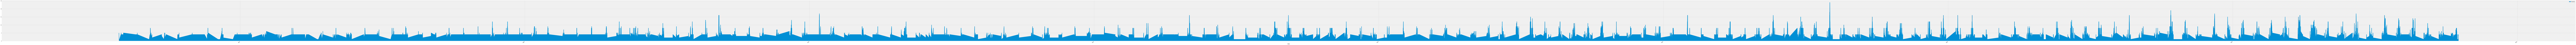

In [22]:
# Lets Look at the frequency of storms over time
stormPointsPerDay_df.plot.area( x= 'Date',figsize = (500,10))
#shows Number of storm records by day

# There has been no significant increase in the number of storms per year over time
# There is definately a rainy season and a non-rainy season for the Atlantic Ocean

In [57]:
### Only Named Storms

# Gather Names
namedStorms_df =  pd.DataFrame(file_df['Name'].unique())
namedStorms_df
#287 Named Storms

,0
0,UNNAMED
1,ABLE
2,BAKER
3,CHARLIE
4,DOG
5,EASY
6,FOX
7,GEORGE
8,HOW
9,ITEM


In [60]:
# Puerto Rico Coordinates range = 18-20*N, 64-67*W
puertoRico_df = file_df[(file_df['Latitude'] > '18N') 
                        & (file_df['Latitude'] < '20N')
                        &(file_df['Longitude'] > '64W') 
                        & (file_df['Longitude'] < '67W')]
puertoRico_df

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
98,AL011852,UNNAMED,18520819,0,,TS,20.5N,67.1W,60,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
181,AL041852,UNNAMED,18520924,1200,,HU,19.1N,65.8W,70,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
182,AL041852,UNNAMED,18520924,1800,,HU,19.2N,66.6W,70,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
183,AL041852,UNNAMED,18520925,0,,HU,19.5N,67.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
940,AL011861,UNNAMED,18610708,600,,TS,20.2N,65.5W,50,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1494,AL061866,UNNAMED,18660930,0,,HU,20.2N,66.3W,100,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1495,AL061866,UNNAMED,18660930,600,,HU,20.6N,67.6W,100,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2064,AL041871,UNNAMED,18710822,600,,HU,19.5N,66.5W,100,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2065,AL041871,UNNAMED,18710822,1200,,HU,20.0N,67.5W,90,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3603,AL021879,UNNAMED,18790814,1200,,TS,19.2N,65.6W,40,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [70]:
# StormPoints Per Date puertoRico_df
puertoRicoPointsPerDay = puertoRico_df.Date.value_counts()
puertoRicoPointsPerDay.head()

# Not too many storms at once
# Date      Records
# 2011-09-12    4
# 1906-09-03    4
# 1999-10-22    3
# 1891-10-15    3
# 2010-08-31    3

2011-09-12    4
1906-09-03    4
1999-10-22    3
1891-10-15    3
2010-08-31    3
Name: Date, dtype: int64

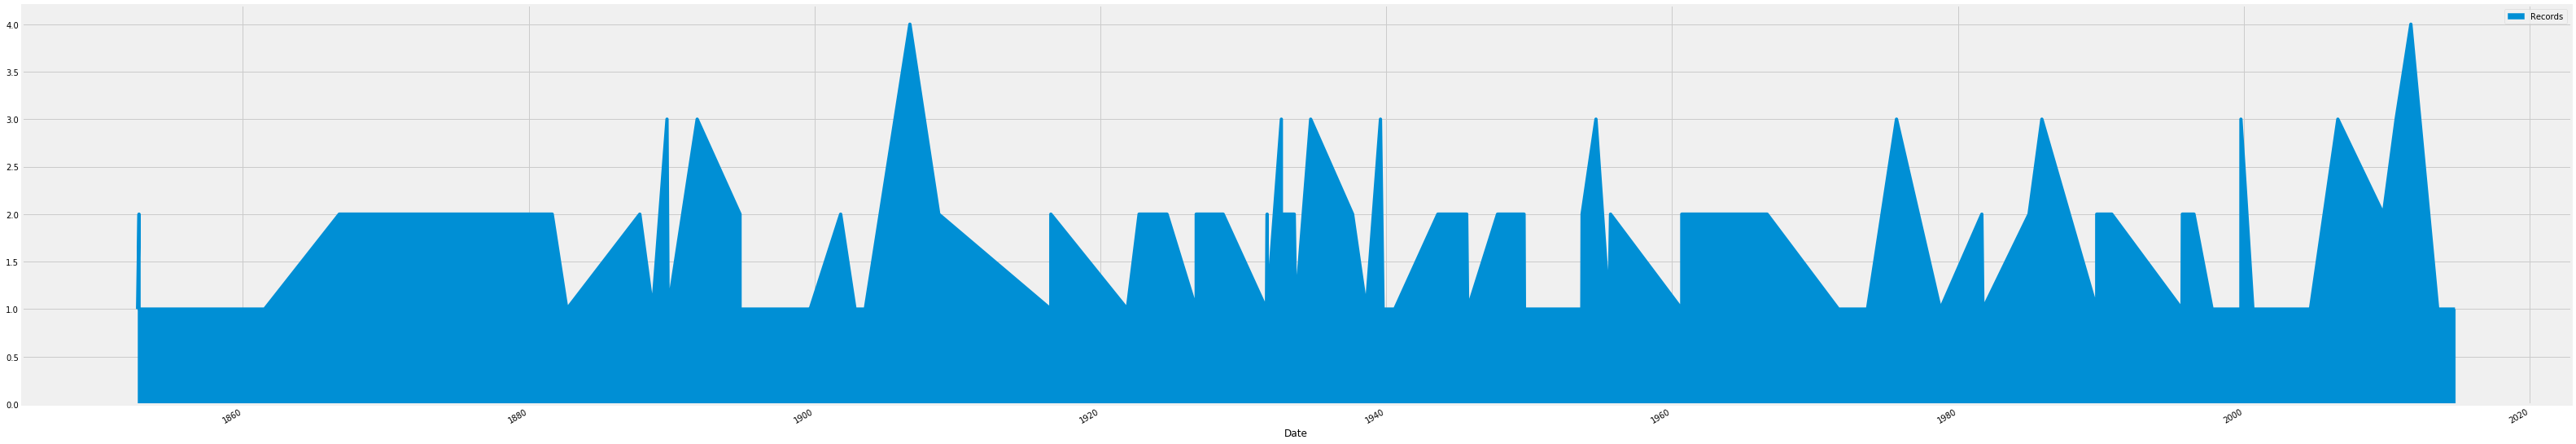

In [71]:
# puertoRico_df chart
puertoRicoPointsPerDay_df = pd.DataFrame(puertoRicoPointsPerDay)
puertoRicoPointsPerDay_df = puertoRicoPointsPerDay_df.rename(columns={'Date':'Records'})
puertoRicoPointsPerDay_df['Date'] = puertoRicoPointsPerDay_df.index
puertoRicoPointsPerDay_df = puertoRicoPointsPerDay_df.sort_values("Date")
puertoRicoPointsPerDay_df = puertoRicoPointsPerDay_df.reset_index(drop=True)
columnsTitles = ["Date","Records"]
puertoRicoPointsPerDay_df = puertoRicoPointsPerDay_df.reindex(columns=columnsTitles)
puertoRicoPointsPerDay_df.Date = pd.to_datetime(puertoRicoPointsPerDay_df.Date, format='%Y%m%d', errors='ignore')
puertoRicoPointsPerDay_df

puertoRicoPointsPerDay_df.plot.area( x= 'Date',figsize = (50,10))

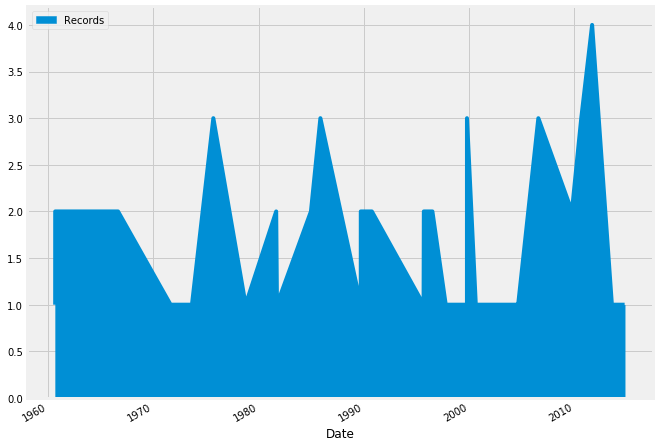

In [81]:
#puertoRico_df last 60 years chart
puertoRicoSince1960_df = puertoRicoPointsPerDay_df[(puertoRicoPointsPerDay_df['Date'] > '1959-12-31')]
puertoRicoSince1960_df

puertoRicoSince1960_df.plot.area(x= 'Date', figsize = (10,8))

In [93]:
# puertoRico_df datetime breakdown
puertoRico_df['year'] = pd.DatetimeIndex(puertoRico_df['Date']).year
puertoRico_df['month'] = pd.DatetimeIndex(puertoRico_df['Date']).month
puertoRico_df['day'] = pd.DatetimeIndex(puertoRico_df['Date']).day

puertoRico_df

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,year,month,day
98,AL011852,UNNAMED,1852-08-19,0,,TS,20.5N,67.1W,60,-999,...,-999,-999,-999,-999,-999,-999,-999,1852,8,19
181,AL041852,UNNAMED,1852-09-24,1200,,HU,19.1N,65.8W,70,-999,...,-999,-999,-999,-999,-999,-999,-999,1852,9,24
182,AL041852,UNNAMED,1852-09-24,1800,,HU,19.2N,66.6W,70,-999,...,-999,-999,-999,-999,-999,-999,-999,1852,9,24
183,AL041852,UNNAMED,1852-09-25,0,,HU,19.5N,67.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,1852,9,25
940,AL011861,UNNAMED,1861-07-08,600,,TS,20.2N,65.5W,50,-999,...,-999,-999,-999,-999,-999,-999,-999,1861,7,8
1494,AL061866,UNNAMED,1866-09-30,0,,HU,20.2N,66.3W,100,-999,...,-999,-999,-999,-999,-999,-999,-999,1866,9,30
1495,AL061866,UNNAMED,1866-09-30,600,,HU,20.6N,67.6W,100,-999,...,-999,-999,-999,-999,-999,-999,-999,1866,9,30
2064,AL041871,UNNAMED,1871-08-22,600,,HU,19.5N,66.5W,100,-999,...,-999,-999,-999,-999,-999,-999,-999,1871,8,22
2065,AL041871,UNNAMED,1871-08-22,1200,,HU,20.0N,67.5W,90,-999,...,-999,-999,-999,-999,-999,-999,-999,1871,8,22
3603,AL021879,UNNAMED,1879-08-14,1200,,TS,19.2N,65.6W,40,-999,...,-999,-999,-999,-999,-999,-999,-999,1879,8,14


In [134]:
# StormPoints Per Month puertoRico_df
puertoRicoPointsPerMonth = (puertoRico_df.month.value_counts())
puertoRicoPointsPerMonth
# September has the Highest concentration
# Month     Records
# 9  Sept   66
# 8  Aug    51
# 10 Oct    26
# 7  July   10
# 11 Nov    5
# 12 Dec    2

9     66
8     51
10    26
7     10
11     5
12     2
Name: month, dtype: int64

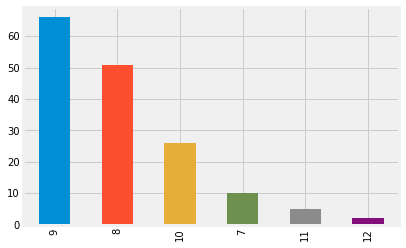

In [131]:
# Bar Chart
puertoRicoPointsPerMonth.plot.bar()

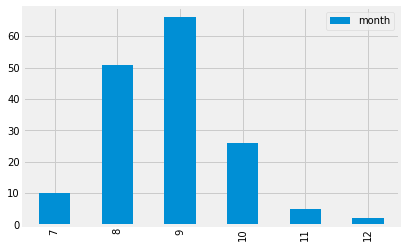

In [141]:
puertoRicoPointsPerMonth_df = pd.DataFrame(puertoRicoPointsPerMonth)
puertoRicoPointsPerMonth_df = puertoRicoPointsPerMonth_df.reindex([7,8,9,10,11,12])
puertoRicoPointsPerMonth_df

# Bar Chart
puertoRicoPointsPerMonth_df.plot.bar()

#